In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv("Dataset/Customers.csv")
transactions = pd.read_csv("Dataset/Transactions.csv")

In [8]:
transactions_agg = transactions.groupby("CustomerID").agg({
    "TotalValue": ["sum", "mean"],
    "TransactionID": "count",
    "ProductID": "nunique"
}).reset_index()

In [9]:
transactions_agg.head()

CustomerID TotalValue          TransactionID ProductID
                    sum     mean         count   nunique
0      C0001    3354.52  670.904             5         5
1      C0002    1862.74  465.685             4         4
2      C0003    2725.38  681.345             4         4
3      C0004    5354.88  669.360             8         8
4      C0005    2034.24  678.080             3         3

In [12]:
transactions_agg.columns = ["CustomerID", "TotalSpending", "AvgTransactionValue", "TransactionCount", "UniqueProducts"]

In [13]:
transactions_agg

,CustomerID,TotalSpending,AvgTransactionValue,TransactionCount,UniqueProducts
0,C0001,3354.52,670.904000,5,5
1,C0002,1862.74,465.685000,4,4
2,C0003,2725.38,681.345000,4,4
3,C0004,5354.88,669.360000,8,8
4,C0005,2034.24,678.080000,3,3
...,...,...,...,...,...
194,C0196,4982.88,1245.720000,4,3
195,C0197,1928.65,642.883333,3,3
196,C0198,931.83,465.915000,2,2
197,C0199,1979.28,494.820000,4,4


In [14]:
features = customers.merge(transactions_agg, on="CustomerID", how="left").fillna(0)

In [16]:
features.isnull().sum()

CustomerID             0
CustomerName           0
Region                 0
SignupDate             0
TotalSpending          0
AvgTransactionValue    0
TransactionCount       0
UniqueProducts         0
dtype: int64

In [20]:
features

,CustomerID,CustomerName,Region,SignupDate,TotalSpending,AvgTransactionValue,TransactionCount,UniqueProducts
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,670.904000,5.0,5.0
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,465.685000,4.0,4.0
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,681.345000,4.0,4.0
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,669.360000,8.0,8.0
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,678.080000,3.0,3.0
...,...,...,...,...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07,4982.88,1245.720000,4.0,3.0
196,C0197,Christina Harvey,Europe,2023-03-21,1928.65,642.883333,3.0,3.0
197,C0198,Rebecca Ray,Europe,2022-02-27,931.83,465.915000,2.0,2.0
198,C0199,Andrea Jenkins,Europe,2022-12-03,1979.28,494.820000,4.0,4.0


In [18]:
scaler = StandardScaler()

In [21]:
scaled_features = scaler.fit_transform(features.iloc[:, 4:])

In [24]:
scaled_features

array([[-0.05188436, -0.05478053,  0.        ,  0.0609912 ],
       [-0.86271433, -0.9039848 , -0.45129368, -0.4081719 ],
       [-0.393842  , -0.01157526, -0.45129368, -0.4081719 ],
       [ 1.03537505, -0.06116966,  1.35388105,  1.46848052],
       [-0.76949861, -0.02508596, -0.90258736, -0.87733501],
       [ 0.42264614,  1.54245503, -0.45129368, -0.4081719 ],
       [-0.47295849,  0.72745786, -0.90258736, -0.87733501],
       [ 0.44658328, -1.06339862,  2.25646841,  2.40680673],
       [-1.38789656, -1.59442354, -0.90258736, -0.87733501],
       [-0.94162972, -1.05418528, -0.45129368, -0.4081719 ],
       [ 0.15220099,  0.25596967,  0.        ,  0.0609912 ],
       [ 0.96818364,  0.2614437 ,  0.90258736,  0.53015431],
       [ 1.38632271,  0.71621421,  0.90258736,  0.99931741],
       [-1.70197101, -1.51238002, -1.80517473, -1.81566122],
       [-1.24604561, -0.43615877, -1.35388105, -1.34649811],
       [ 0.23069786,  0.37549279,  0.        ,  0.0609912 ],
       [ 0.70867979, -0.

In [27]:
### Finding WCSS Values for different number of clusters

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(scaled_features)  
    wcss.append(kmeans.inertia_)

C:\Users\Sharma\anaconda3\envs\jupyter_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sharma\anaconda3\envs\jupyter_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sharma\anaconda3\envs\jupyter_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Sharma\anaconda3\envs\jupyter_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default 

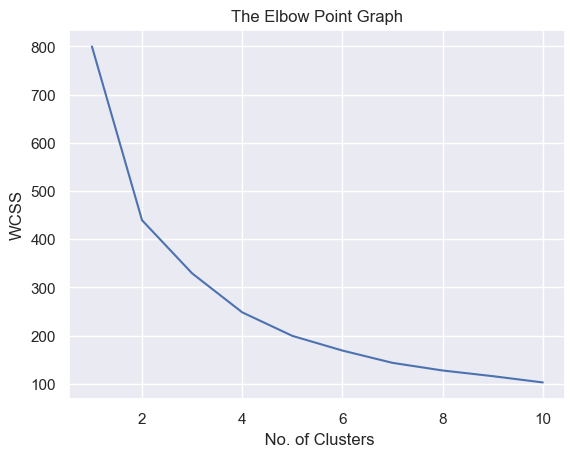

In [30]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel(" No. of Clusters")
plt.ylabel("WCSS")
plt.show()

In [38]:
kmeans = KMeans(n_clusters=5, init="k-means++",random_state=0)
Y = kmeans.fit_predict(scaled_features)
print(Y)

[3 4 4 1 4 2 4 1 0 4 3 1 1 0 4 3 1 2 3 4 1 3 1 3 0 2 4 1 4 3 4 0 0 3 4 4 2
 3 3 2 1 4 0 2 1 1 3 3 3 2 1 4 1 1 3 3 3 0 1 0 4 4 4 3 1 2 3 1 3 4 0 3 4 2
 1 3 0 4 2 4 3 1 0 1 4 3 1 3 2 3 3 4 1 0 4 2 0 3 1 1 1 1 3 1 3 3 3 1 1 4 3
 4 1 2 2 3 2 3 0 4 0 1 4 3 4 3 3 0 4 0 4 4 4 3 4 3 3 2 3 4 1 4 1 4 1 4 3 2
 2 0 0 3 3 3 1 1 3 2 4 3 3 1 2 3 1 4 4 2 3 2 2 3 1 3 1 4 4 4 3 0 3 2 3 3 2
 4 2 1 3 3 3 4 4 3 3 2 4 0 4 2]


C:\Users\Sharma\anaconda3\envs\jupyter_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [39]:
db_index = davies_bouldin_score(scaled_features, Y)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 0.8920823846457552


In [40]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

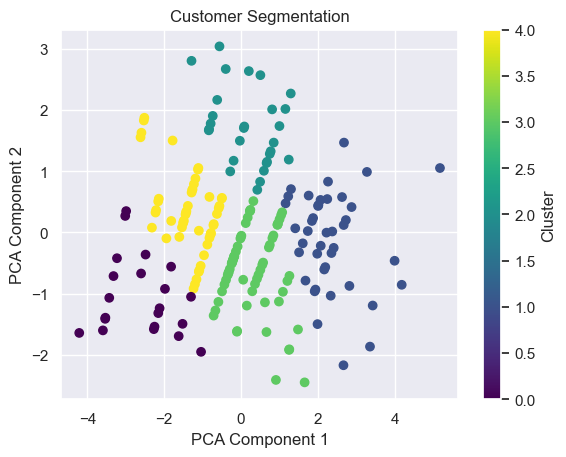

In [41]:
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=Y, cmap='viridis')
plt.title("Customer Segmentation")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

Explained variance ratio: [0.6966084  0.28456108]
Total variance explained: 98.11694883143136 %


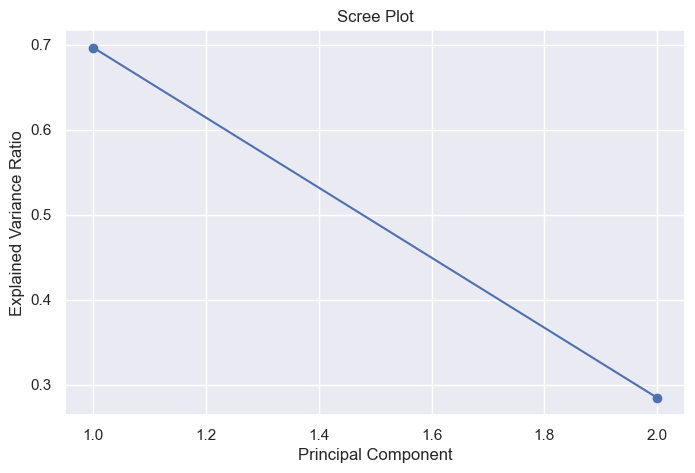

In [43]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)
print("Total variance explained:", sum(explained_variance_ratio) * 100, "%")

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

### The explained variance shows:

-First component (PC1) explains 69.66% of variance

-Second component (PC2) explains 28.46% of variance

-Total: 98.12% of the data's variance is captured

### This means your 2D PCA visualization is highly reliable because:

-The model only losing about 1.88% of the information

-Generally, anything above 80% total explained variance is considered good

-The model is above that at 98.12% that's good